In [18]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv("fifa21 raw data v2.csv")
df.head()

C:\Users\Nhat Nam\AppData\Local\Temp\ipykernel_19424\3139465668.py:1: DtypeWarning: Columns (76) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv("fifa21 raw data v2.csv")


,ID,Name,LongName,photoUrl,playerUrl,Nationality,Age,↓OVA,POT,Club,...,A/W,D/W,IR,PAC,SHO,PAS,DRI,DEF,PHY,Hits
0,158023,L. Messi,Lionel Messi,https://cdn.sofifa.com/players/158/023/21_60.png,http://sofifa.com/player/158023/lionel-messi/2...,Argentina,33,93,93,\n\n\n\nFC Barcelona,...,Medium,Low,5 ★,85,92,91,95,38,65,771
1,20801,Cristiano Ronaldo,C. Ronaldo dos Santos Aveiro,https://cdn.sofifa.com/players/020/801/21_60.png,http://sofifa.com/player/20801/c-ronaldo-dos-s...,Portugal,35,92,92,\n\n\n\nJuventus,...,High,Low,5 ★,89,93,81,89,35,77,562
2,200389,J. Oblak,Jan Oblak,https://cdn.sofifa.com/players/200/389/21_60.png,http://sofifa.com/player/200389/jan-oblak/210006/,Slovenia,27,91,93,\n\n\n\nAtlético Madrid,...,Medium,Medium,3 ★,87,92,78,90,52,90,150
3,192985,K. De Bruyne,Kevin De Bruyne,https://cdn.sofifa.com/players/192/985/21_60.png,http://sofifa.com/player/192985/kevin-de-bruyn...,Belgium,29,91,91,\n\n\n\nManchester City,...,High,High,4 ★,76,86,93,88,64,78,207
4,190871,Neymar Jr,Neymar da Silva Santos Jr.,https://cdn.sofifa.com/players/190/871/21_60.png,http://sofifa.com/player/190871/neymar-da-silv...,Brazil,28,91,91,\n\n\n\nParis Saint-Germain,...,High,Medium,5 ★,91,85,86,94,36,59,595


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18979 entries, 0 to 18978
Data columns (total 77 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   ID                18979 non-null  int64 
 1   Name              18979 non-null  object
 2   LongName          18979 non-null  object
 3   photoUrl          18979 non-null  object
 4   playerUrl         18979 non-null  object
 5   Nationality       18979 non-null  object
 6   Age               18979 non-null  int64 
 7   ↓OVA              18979 non-null  int64 
 8   POT               18979 non-null  int64 
 9   Club              18979 non-null  object
 10  Contract          18979 non-null  object
 11  Positions         18979 non-null  object
 12  Height            18979 non-null  object
 13  Weight            18979 non-null  object
 14  Preferred Foot    18979 non-null  object
 15  BOV               18979 non-null  int64 
 16  Best Position     18979 non-null  object
 17  Joined      

In [4]:
#Xóa cột dư thừa
df.drop(['photoUrl','playerUrl','↓OVA','POT','Loan Date End'],axis=1,inplace=True)
df.head()

,ID,Name,LongName,Nationality,Age,Club,Contract,Positions,Height,Weight,...,A/W,D/W,IR,PAC,SHO,PAS,DRI,DEF,PHY,Hits
0,158023,L. Messi,Lionel Messi,Argentina,33,\n\n\n\nFC Barcelona,2004 ~ 2021,"RW, ST, CF",170cm,72kg,...,Medium,Low,5 ★,85,92,91,95,38,65,771
1,20801,Cristiano Ronaldo,C. Ronaldo dos Santos Aveiro,Portugal,35,\n\n\n\nJuventus,2018 ~ 2022,"ST, LW",187cm,83kg,...,High,Low,5 ★,89,93,81,89,35,77,562
2,200389,J. Oblak,Jan Oblak,Slovenia,27,\n\n\n\nAtlético Madrid,2014 ~ 2023,GK,188cm,87kg,...,Medium,Medium,3 ★,87,92,78,90,52,90,150
3,192985,K. De Bruyne,Kevin De Bruyne,Belgium,29,\n\n\n\nManchester City,2015 ~ 2023,"CAM, CM",181cm,70kg,...,High,High,4 ★,76,86,93,88,64,78,207
4,190871,Neymar Jr,Neymar da Silva Santos Jr.,Brazil,28,\n\n\n\nParis Saint-Germain,2017 ~ 2022,"LW, CAM",175cm,68kg,...,High,Medium,5 ★,91,85,86,94,36,59,595


In [5]:
hit = df[df['Hits'].str.contains('K', na=False)]
hit.head()

,ID,Name,LongName,Nationality,Age,Club,Contract,Positions,Height,Weight,...,A/W,D/W,IR,PAC,SHO,PAS,DRI,DEF,PHY,Hits
8,231747,K. Mbappé,Kylian Mbappé,France,21,\n\n\n\nParis Saint-Germain,2018 ~ 2022,"ST, LW, RW",178cm,73kg,...,High,Low,3 ★,96,86,78,91,39,76,1.6K
29,233049,J. Sancho,Jadon Sancho,England,20,\n\n\n\nBorussia Dortmund,2017 ~ 2023,"RM, LM, CAM",180cm,76kg,...,High,Medium,3 ★,83,74,81,91,37,64,1.1K
34,212198,Bruno Fernandes,Bruno Miguel Borges Fernandes,Portugal,25,\n\n\n\nManchester United,2020 ~ 2025,"CAM, CM",179cm,69kg,...,High,High,2 ★,77,83,88,85,68,75,1.5K
68,231677,M. Rashford,Marcus Rashford,England,22,\n\n\n\nManchester United,2014 ~ 2023,"LM, ST",186cm,70kg,...,High,Medium,2 ★,91,83,78,86,45,78,3.2K
105,239085,E. Haaland,Erling Haaland,Norway,19,\n\n\n\nBorussia Dortmund,2020 ~ 2024,ST,194cm,88kg,...,High,High,2 ★,84,87,63,76,43,85,1.7K


In [6]:
#Thay đổi dòng dữ liệu có kí tự 'K'
def convert_k_to_number(x):
    if pd.isna(x):
        return np.nan
    if isinstance(x,str) and 'K' in x:
        return float(x.replace('K','')) * 1000
    return float(x)
df['Hits'] = df['Hits'].apply(convert_k_to_number)


In [7]:
#Thay thế dòng NaN bằng giá trị mean
df['Hits'] = df['Hits'].fillna(df['Hits'].mean())
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18979 entries, 0 to 18978
Data columns (total 72 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   ID                18979 non-null  int64  
 1   Name              18979 non-null  object 
 2   LongName          18979 non-null  object 
 3   Nationality       18979 non-null  object 
 4   Age               18979 non-null  int64  
 5   Club              18979 non-null  object 
 6   Contract          18979 non-null  object 
 7   Positions         18979 non-null  object 
 8   Height            18979 non-null  object 
 9   Weight            18979 non-null  object 
 10  Preferred Foot    18979 non-null  object 
 11  BOV               18979 non-null  int64  
 12  Best Position     18979 non-null  object 
 13  Joined            18979 non-null  object 
 14  Value             18979 non-null  object 
 15  Wage              18979 non-null  object 
 16  Release Clause    18979 non-null  object

## Chuyển các cột height và weight sang dạng số (numerical forms)

In [8]:
#Chuyển đổi feet/inches sang cm và xóa cm cho column Height
#B1: Feet/Inches -> cm
mask_feet = df['Height'].astype(str).str.contains(r"^\d+'\d+\"", na=False)
feet_inch = df.loc[mask_feet,'Height'].str.extract(r"(\d+)'(\d+)\"").astype(float)
df.loc[mask_feet,'Height'] = feet_inch[0] * 30.48 + feet_inch[1] * 2.54

#B2: cm ->  bỏ chữ cm
mask_cm = df['Height'].astype(str).str.contains('cm','',na=False)
df.loc[mask_cm,'Height'] = df.loc[mask_cm,'Height'].astype(str).str.replace('cm','',regex=False)

#B3: Ép kiểu float
df['Height'] = df['Height'].astype(float)

In [9]:
#Chuyển đổi lbs sang kg và xóa kg cho column Weight
#B1: lbs -> kg
mask_lbs = df['Weight'].astype(str).str.contains('lbs',na=False)
df_lbs = df.loc[mask_lbs,'Weight'].astype(str).str.replace('lbs','',regex=False).astype(float)
df.loc[mask_lbs,'Weight'] = df_lbs *0.4536

#B2: kg -> bỏ chữ kg
mask_kg = df['Weight'].astype(str).str.contains('kg','',na=False)
df.loc[mask_kg,'Weight'] = df.loc[mask_kg,'Weight'].astype(str).str.replace('kg','',regex=False)

#B3: Ép kiểu float
df['Weight'] = df['Weight'].astype(float)

## Xóa các ký tự xuống dòng (newline characters) không cần thiết khỏi tất cả các cột có chứa chúng


In [10]:
df['Club'] = df['Club'].str.replace('\n','',regex=False).str.strip()
df.head()

,ID,Name,LongName,Nationality,Age,Club,Contract,Positions,Height,Weight,...,A/W,D/W,IR,PAC,SHO,PAS,DRI,DEF,PHY,Hits
0,158023,L. Messi,Lionel Messi,Argentina,33,FC Barcelona,2004 ~ 2021,"RW, ST, CF",170.0,72.0,...,Medium,Low,5 ★,85,92,91,95,38,65,771.0
1,20801,Cristiano Ronaldo,C. Ronaldo dos Santos Aveiro,Portugal,35,Juventus,2018 ~ 2022,"ST, LW",187.0,83.0,...,High,Low,5 ★,89,93,81,89,35,77,562.0
2,200389,J. Oblak,Jan Oblak,Slovenia,27,Atlético Madrid,2014 ~ 2023,GK,188.0,87.0,...,Medium,Medium,3 ★,87,92,78,90,52,90,150.0
3,192985,K. De Bruyne,Kevin De Bruyne,Belgium,29,Manchester City,2015 ~ 2023,"CAM, CM",181.0,70.0,...,High,High,4 ★,76,86,93,88,64,78,207.0
4,190871,Neymar Jr,Neymar da Silva Santos Jr.,Brazil,28,Paris Saint-Germain,2017 ~ 2022,"LW, CAM",175.0,68.0,...,High,Medium,5 ★,91,85,86,94,36,59,595.0


## Dựa vào cột 'Joined', kiểm tra cầu thủ nào đã chơi cho một câu lạc bộ hơn 10 năm


In [11]:
df["Joined"] = pd.to_datetime(df["Joined"],format='%b %d, %Y')
df.head()

,ID,Name,LongName,Nationality,Age,Club,Contract,Positions,Height,Weight,...,A/W,D/W,IR,PAC,SHO,PAS,DRI,DEF,PHY,Hits
0,158023,L. Messi,Lionel Messi,Argentina,33,FC Barcelona,2004 ~ 2021,"RW, ST, CF",170.0,72.0,...,Medium,Low,5 ★,85,92,91,95,38,65,771.0
1,20801,Cristiano Ronaldo,C. Ronaldo dos Santos Aveiro,Portugal,35,Juventus,2018 ~ 2022,"ST, LW",187.0,83.0,...,High,Low,5 ★,89,93,81,89,35,77,562.0
2,200389,J. Oblak,Jan Oblak,Slovenia,27,Atlético Madrid,2014 ~ 2023,GK,188.0,87.0,...,Medium,Medium,3 ★,87,92,78,90,52,90,150.0
3,192985,K. De Bruyne,Kevin De Bruyne,Belgium,29,Manchester City,2015 ~ 2023,"CAM, CM",181.0,70.0,...,High,High,4 ★,76,86,93,88,64,78,207.0
4,190871,Neymar Jr,Neymar da Silva Santos Jr.,Brazil,28,Paris Saint-Germain,2017 ~ 2022,"LW, CAM",175.0,68.0,...,High,Medium,5 ★,91,85,86,94,36,59,595.0


In [12]:
player_over_10y = df[(pd.Timestamp.now().year - df['Joined'].dt.year) > 10]
player_over_10y

,ID,Name,LongName,Nationality,Age,Club,Contract,Positions,Height,Weight,...,A/W,D/W,IR,PAC,SHO,PAS,DRI,DEF,PHY,Hits
0,158023,L. Messi,Lionel Messi,Argentina,33,FC Barcelona,2004 ~ 2021,"RW, ST, CF",170.0,72.0,...,Medium,Low,5 ★,85,92,91,95,38,65,771.00000
2,200389,J. Oblak,Jan Oblak,Slovenia,27,Atlético Madrid,2014 ~ 2023,GK,188.0,87.0,...,Medium,Medium,3 ★,87,92,78,90,52,90,150.00000
5,188545,R. Lewandowski,Robert Lewandowski,Poland,31,FC Bayern München,2014 ~ 2023,ST,184.0,80.0,...,High,Medium,4 ★,78,91,78,85,43,82,248.00000
9,192448,M. ter Stegen,Marc-André ter Stegen,Germany,28,FC Barcelona,2014 ~ 2022,GK,187.0,85.0,...,Medium,Medium,3 ★,88,85,88,90,45,88,130.00000
12,200145,Casemiro,Carlos Henrique Venancio Casimiro,Brazil,28,Real Madrid,2013 ~ 2023,CDM,185.0,84.0,...,High,High,3 ★,65,73,76,72,86,91,175.00000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18107,222185,Cui Ming'an,Ming'an Cui,China PR,25,Dalian YiFang FC,2014 ~ 2022,"CDM, CM",180.0,70.0,...,Low,Medium,1 ★,60,34,47,46,53,63,26.56958
18251,231593,G. Harkin,Gareth Harkin,Republic of Ireland,32,Finn Harps,2014 ~ 2020,"CM, LB, LM",180.0,80.0,...,Low,Medium,1 ★,42,39,57,53,52,62,26.56958
18307,247191,Song Zhiwei,Zhiwei Song,China PR,31,Wuhan Zall,2014 ~ 2020,"CM, CDM",185.0,80.0,...,Low,Medium,1 ★,57,41,52,52,55,70,26.56958
18390,225342,J. Stevens,Jack Stevens,England,22,Oxford United,2014 ~ 2021,GK,188.0,77.0,...,Medium,Medium,1 ★,56,50,47,54,42,45,26.56958


## Các cột 'Value', 'Wage' và 'Release Clause' là dạng chuỗi (string columns). Chuyển chúng thành dạng số (numbers). Ví dụ: "M" trong cột Value là Million, nên nhân giá trị hàng đó với 1,000,000

In [13]:
cols_with_euro = ['Value','Wage','Release Clause']
for col in cols_with_euro:
    df[col] = df[col].str.replace('€','',regex=False)
# df['Value'] = df['Value'].str.replace('€','',regex=False)
# df['Wage'] = df['Wage'].str.replace('€','',regex=False)
# df['Release Clause'] = df['Release Clause'].str.replace('€','',regex=False)

In [14]:
def convert_currency_to_number(x):
    if pd.isna(x):
        return np.nan
    if isinstance(x,str) and 'M' in x:
        return float(x.replace('M','')) * 1000000
    else: 
        return float(x.replace('K','')) * 1000
    return float(x)
for col in cols_with_euro:
    df[col] = df[col].apply(convert_currency_to_number)
# df['Value'] = df['Value'].apply(convert_currency_to_number)
# df['Wage'] = df['Wage'].apply(convert_currency_to_number)
# df['Release Clause'] = df['Release Clause'].apply(convert_currency_to_number)

## Một số cột có chứa ký tự 'star'. Loại bỏ ký tự này khỏi các cột đó và chuyển các cột thành dạng số (numerical)

In [15]:
cols_with_star = [
    col for col in df.columns
    if df[col].astype(str).str.contains('★').any()
]
cols_with_star
for col in cols_with_star:
    df[col] = df[col].str.replace('★','',regex=False)

## Xác định những cầu thủ nào có giá trị cao (highly valuable) nhưng vẫn được trả lương thấp (underpaid) (gợi ý: vẽ scatter plot giữa wage và value)

In [17]:
value_threshold = df['Value'].mean()
wage_threshold = df['Wage'].mean()

df['HighValue_LowWage'] = (df['Value'] > value_threshold) & (df['Wage'] < wage_threshold)
df['HighValue_LowWage']
underpaid_start = df[df['HighValue_LowWage']]
underpaid_start[['Name','Value','Wage']]


,Name,Value,Wage
2,J. Oblak,120000000.0,125000.0
24,S. Handanovič,10000000.0,100000.0
29,J. Sancho,124000000.0,82000.0
30,T. Alexander-Arnold,114000000.0,110000.0
38,K. Navas,26000000.0,110000.0
...,...,...,...
7144,L. Traoré,2900000.0,4000.0
7150,N. Raskin,2900000.0,4000.0
7164,G. Arabidze,3000000.0,5000.0
7326,H. Abe,3000000.0,36000.0


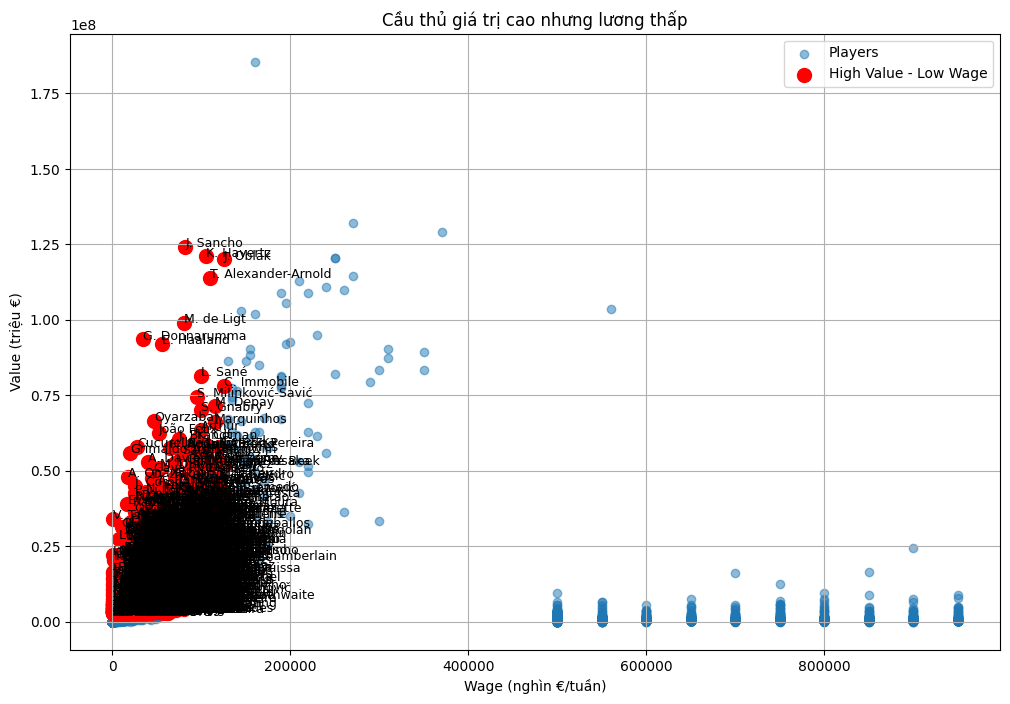

In [23]:
plt.figure(figsize=(12,8))

# Vẽ tất cả cầu thủ
plt.scatter(df['Wage'], df['Value'], label='Players', alpha=0.5)

# Vẽ riêng nhóm High Value & Low Wage
highlight = df['HighValue_LowWage']
plt.scatter(df.loc[highlight, 'Wage'], df.loc[highlight, 'Value'],
            color='red', label='High Value - Low Wage', s=100)

# Ghi tên cầu thủ được highlight
for i, row in df[highlight].iterrows():
    plt.text(row['Wage']+0.5, row['Value']+1, row['Name'], fontsize=9)

plt.xlabel('Wage (nghìn €/tuần)')
plt.ylabel('Value (triệu €)')
plt.title('Cầu thủ giá trị cao nhưng lương thấp')
plt.legend()
plt.grid(True)
plt.show()


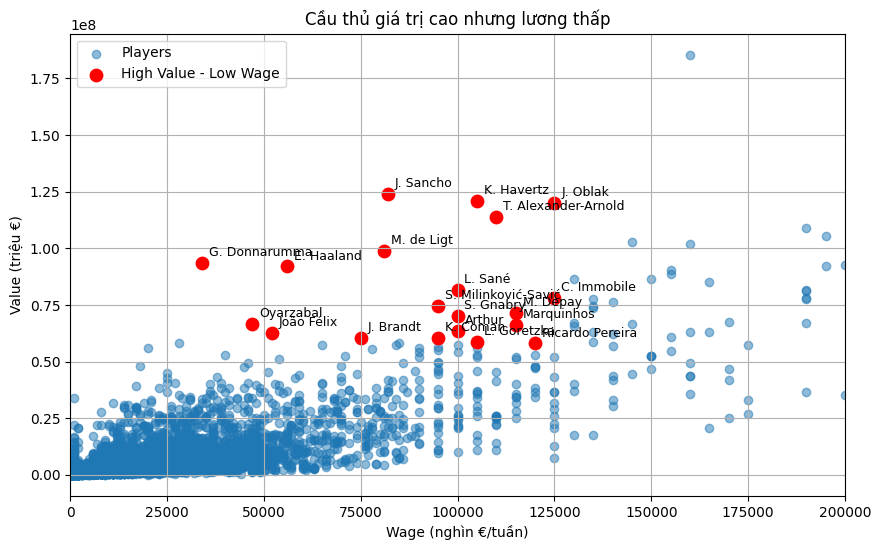

In [20]:
# Lọc nhóm high value & low wage
highlight = df['HighValue_LowWage']

# Lấy top 20 theo Value
top_players = df[highlight].nlargest(20, 'Value')

plt.figure(figsize=(10,6))
plt.scatter(df['Wage'], df['Value'], alpha=0.5, label='Players')
plt.scatter(top_players['Wage'], top_players['Value'], 
            color='red', label='High Value - Low Wage', s=80)

# Annotate tên cầu thủ
for _, row in top_players.iterrows():
    plt.annotate(row['Name'], 
                 (row['Wage'], row['Value']),
                 textcoords="offset points", 
                 xytext=(5,5), ha='left', fontsize=9)

plt.xlabel('Wage (nghìn €/tuần)')
plt.ylabel('Value (triệu €)')
plt.title('Cầu thủ giá trị cao nhưng lương thấp')
plt.legend()
plt.grid(True)
plt.xlim(0, 200000)  # Giới hạn trục X
plt.show()